In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def circuit(alice):
    e = QuantumRegister(2, name='e')
    a = QuantumRegister(1, name='a')
    b = QuantumRegister(1, name='b')
    c = ClassicalRegister(2, name='c')
    
    qc = QuantumCircuit(e, a, b, c, name='circuit')
    
    # Initialize Target qubit
    qc.initialize(alice / np.linalg.norm(alice), e)
    qc.barrier()
    
    # Create Bell pair
    qc.h(a)
    qc.cx(a, b)
    qc.barrier()

    # Write target qubit to Bell pair
    qc.cz(e[0], a)
    qc.cx(e[1], a)
    qc.barrier()

    # Decoding
    qc.cx(a, b)
    qc.h(a)
    qc.measure(a, c[1])
    qc.measure(b, c[0])

    backend = Aer.get_backend('qasm_simulator')
    return qc, execute(qc, backend).result().get_counts()

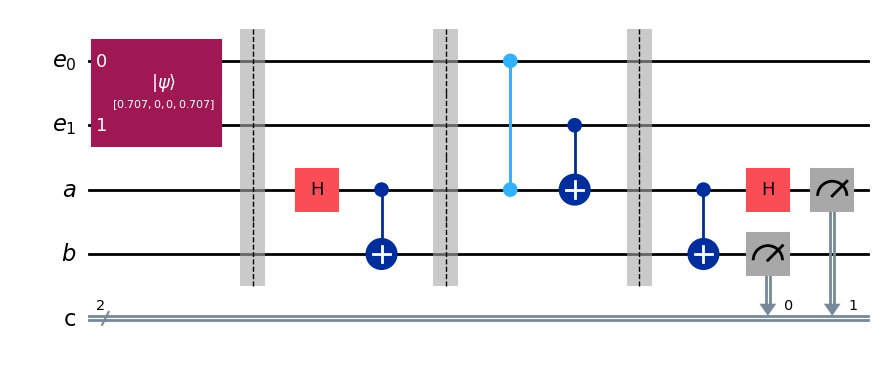

In [3]:
qc, counts = circuit([1,0,0,1])

qc.draw(output='mpl', style='iqx')

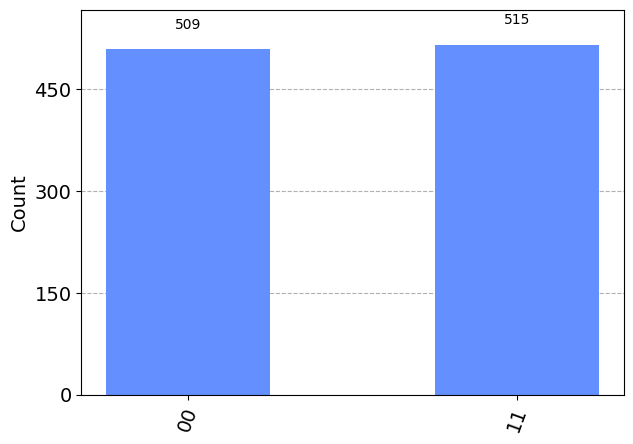

In [4]:
plot_histogram(counts)